In [41]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from numpy import argmax

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


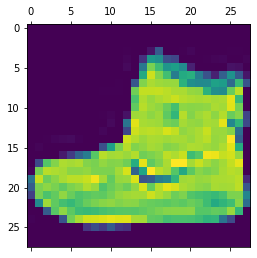

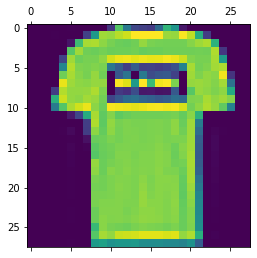

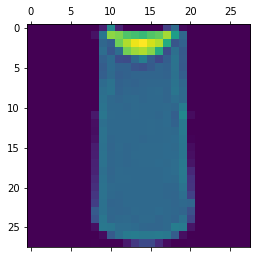

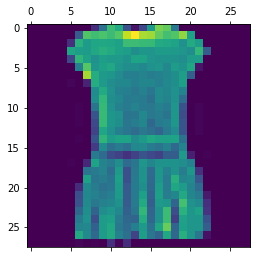

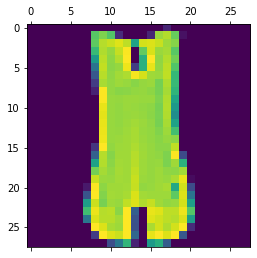

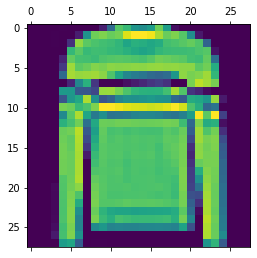

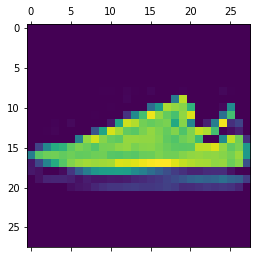

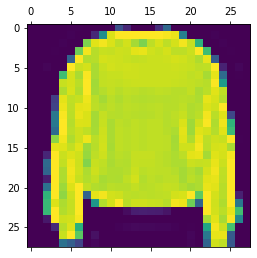

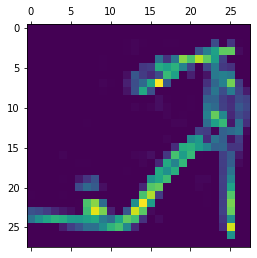

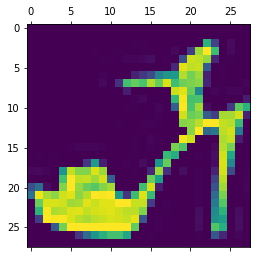

In [3]:
for i in range(10):
    plt.matshow(x_train[i])
    plt.show()

In [4]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [10]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [29]:
cnn = Sequential([
                    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
                    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
                    layers.MaxPooling2D((2, 2)), 
                    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
                    layers.MaxPooling2D((2, 2)),
                    

                    layers.Flatten(),
                    layers.Dense(500, activation = 'relu'),
                    layers.Dense(500, activation = 'relu'),
                    layers.Dense(10, activation = 'sigmoid')
])



cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
cnn.fit(x_train_scaled, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4361 - accuracy: 0.8381
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2881 - accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2477 - accuracy: 0.9077
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2183 - accuracy: 0.9180
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1897 - accuracy: 0.9276
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1670 - accuracy: 0.9362
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1452 - accuracy: 0.9442
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1301 - accuracy: 0.9499
Epoch 9/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1130 - accuracy: 0.9573
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [36]:
cnn.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.3100 - accuracy: 0.1000


[2.3099868297576904, 0.10000000149011612]

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [39]:
yp = cnn.predict(x_test)

In [45]:
y_pred = [argmax(i) for i in yp]

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      1000
           1       0.89      0.98      0.93      1000
           2       0.62      0.84      0.71      1000
           3       0.87      0.65      0.75      1000
           4       0.47      0.61      0.53      1000
           5       0.88      0.97      0.92      1000
           6       0.64      0.16      0.26      1000
           7       0.71      0.79      0.75      1000
           8       0.95      0.92      0.93      1000
           9       0.98      0.64      0.77      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.73     10000
weighted avg       0.76      0.75      0.73     10000

